In [5]:
from langchain_community.document_loaders import UnstructuredURLLoader

urls = ['https://langchain-ai.github.io/langgraph/concepts/why-langgraph/']
loader = UnstructuredURLLoader(urls=urls)
docs = loader.load()


In [6]:
#docs

In [7]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)

print("Total number of documents: ",len(all_splits))

Total number of documents:  2


In [8]:
all_splits

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph/'}, page_content="Overview¶\n\nLangGraph is built for developers who want to build powerful, adaptable AI agents. Developers choose LangGraph for:\n\nReliability and controllability. Steer agent actions with moderation checks and human-in-the-loop approvals. LangGraph persists context for long-running workflows, keeping your agents on course.\n\nLow-level and extensible. Build custom agents with fully descriptive, low-level primitives free from rigid abstractions that limit customization. Design scalable multi-agent systems, with each agent serving a specific role tailored to your use case.\n\nFirst-class streaming support. With token-by-token streaming and streaming of intermediate steps, LangGraph gives users clear visibility into agent reasoning and actions as they unfold in real time.\n\nLearn LangGraph basics¶\n\nTo get acquainted with LangGraph's key concepts and features, complete the 

In [9]:

# Embedding models: https://python.langchain.com/v0.1/docs/integrations/text_embedding/

# Let's load the Hugging Face Embedding class.  sentence_transformers
from langchain_community.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings()

vector = embeddings.embed_query("hello, world!")
vector[:5]

/var/folders/3c/n16ntvpx71gczgh_k1wjf9_c0000gp/T/ipykernel_9496/3361409261.py:5: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings()
/var/folders/3c/n16ntvpx71gczgh_k1wjf9_c0000gp/T/ipykernel_9496/3361409261.py:5: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embeddings = HuggingFaceEmbeddings()


[0.034922681748867035,
 0.01883004792034626,
 -0.0178547203540802,
 0.0001388715609209612,
 0.0740736573934555]

In [10]:
#!pip install langchain_chroma

from langchain_chroma import Chroma
from langchain_core.documents import Document

vectorstore = Chroma.from_documents(documents=all_splits, embedding=HuggingFaceEmbeddings())

# if you want to store chromadb locally

# vectorstore = Chroma.from_documents(
#     documents=docs,
#     embedding=HuggingFaceEmbeddings(),
#     persist_directory="./my_chroma_db"  # Custom directory
# )


# Loading the Database Later
# This reloads the previously stored embeddings so you don’t have to recompute them.

# vectorstore = Chroma(
#     persist_directory="./my_chroma_db",
#     embedding_function=HuggingFaceEmbeddings()
# )

/var/folders/3c/n16ntvpx71gczgh_k1wjf9_c0000gp/T/ipykernel_9496/4288330488.py:6: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  vectorstore = Chroma.from_documents(documents=all_splits, embedding=HuggingFaceEmbeddings())


In [11]:
from langchain_huggingface import HuggingFacePipeline
from langchain.prompts import PromptTemplate
from transformers import pipeline
from langchain_core.output_parsers import StrOutputParser
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer


#model_id = "meta-llama/Meta-Llama-3-8B"
model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

# text_generation_pipeline = pipeline(
#     "text-generation", model=model_id, model_kwargs={"torch_dtype": torch.bfloat16}, max_new_tokens=400, device=0)


text_generation_pipeline = pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    max_new_tokens=200,
    device=0,
    temperature=0.7,  #  (lower values = more deterministic)
    top_k=50,  # Filters out low-probability tokens
)


llm = HuggingFacePipeline(pipeline=text_generation_pipeline)



Device set to use mps:0


In [12]:
# from langchain_core.prompts import PromptTemplate

# template = """Use the following pieces of context to answer the question at the end.
# If you don't know the answer, just say that you don't know, don't try to make up an answer.
# Use three sentences maximum and keep the answer as concise as possible.
# Always say "thanks for asking!" at the end of the answer.

# {context}

# Question: {question}

# Helpful Answer:"""
# prompt = PromptTemplate.from_template(template)


from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

/Users/guptayas/.pyenv/versions/langchain-env/lib/python3.10/site-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [13]:
prompt

ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})])

In [14]:
from typing_extensions import List, TypedDict
from langchain.schema import Document

# Define state for application
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str


In [15]:
# Define application steps
def retrieve(state: State):
    retrieved_docs = vectorstore.similarity_search(state["question"],  k=1)
    return {"context": retrieved_docs}



In [16]:
retrieve({"question": "Hello"})

{'context': [Document(id='90d6d0e3-ad23-4242-b334-81fcdb8a2581', metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph/'}, page_content="To get acquainted with LangGraph's key concepts and features, complete the following LangGraph basics tutorials series:\n\nBuild a basic chatbot\n\nAdd tools\n\nAdd memory\n\nAdd human-in-the-loop controls\n\nCustomize state\n\nTime travel\n\nIn completing this series of tutorials, you will build a support chatbot in LangGraph that can:\n\n✅ Answer common questions by searching the web\n\n✅ Maintain conversation state across calls\n\n✅ Route complex queries to a human for review\n\n✅ Use custom state to control its behavior\n\n✅ Rewind and explore alternative conversation paths")]}

In [17]:
def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    #return {"answer": response.content}
    return {"answer": response}



In [18]:
from langgraph.graph import START, StateGraph

# Compile application and test
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

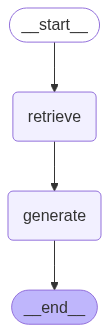

In [19]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
response = graph.invoke({"question": "what is langgraph?"})
print(response)

{'question': 'what is langgraph?', 'context': [Document(id='90d6d0e3-ad23-4242-b334-81fcdb8a2581', metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph/'}, page_content="To get acquainted with LangGraph's key concepts and features, complete the following LangGraph basics tutorials series:\n\nBuild a basic chatbot\n\nAdd tools\n\nAdd memory\n\nAdd human-in-the-loop controls\n\nCustomize state\n\nTime travel\n\nIn completing this series of tutorials, you will build a support chatbot in LangGraph that can:\n\n✅ Answer common questions by searching the web\n\n✅ Maintain conversation state across calls\n\n✅ Route complex queries to a human for review\n\n✅ Use custom state to control its behavior\n\n✅ Rewind and explore alternative conversation paths")], 'answer': "Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three 